# AIエンジニアを目指す人のための機械学習入門

## 第４章：実装しながら学ぶアルゴリズムのこころ・発展編

### <u>勾配(Gradiant)ブースティング決定木によるクラス分類</u>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# データセットの準備
X, y = datasets.make_classification(n_classes=2, n_features=20, n_samples=500, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)

(375, 20)
(125, 20)


In [2]:
from sklearn import ensemble

# Gradient Boostingを適用
gb = ensemble.GradientBoostingClassifier(n_estimators=500, random_state=0)

# Random Forest
rf = ensemble.RandomForestClassifier(n_estimators=500, random_state=0)

gb.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("GB train: {}".format(gb.score(X_train, y_train)))
print("RF train: {}".format(rf.score(X_train, y_train)))
print("GB test: {}".format(gb.score(X_test, y_test)))
print("RF test: {}".format(rf.score(X_test, y_test)))

GB train: 1.0
RF train: 1.0
GB test: 0.912
RF test: 0.896


過学習の抑制のためにearlu stoppingを適用

In [3]:
# early stoppingを適用したGradiant Boostingを適用
gbes = ensemble.GradientBoostingClassifier(n_estimators=500, validation_fraction=0.25, n_iter_no_change=5, random_state=0)
gbes.fit(X_train, y_train)

print("GB with early stopping train: {}".format(gbes.score(X_train, y_train)))
print("GB with early stopping test: {}".format(gbes.score(X_test, y_test)))
print("The number of estimators: {}".format(len(gbes.estimators_)))


GB with early stopping train: 0.9653333333333334
GB with early stopping test: 0.92
The number of estimators: 44


### <u>エルボー法とシルエット分析によるクラスタ数の探索</u>

#### エルボー法

クラスタ数２で実験

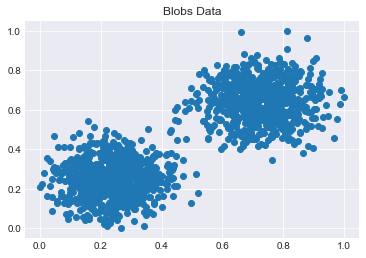

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

plt.style.use("seaborn-darkgrid")


X, y = make_blobs(n_samples=1500, n_features=2, centers=2, random_state=3)


X_norm = MinMaxScaler().fit_transform(X)

# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_norm[:, 0], X_norm[: , 1])
plt.title("Blobs Data")
plt.show()

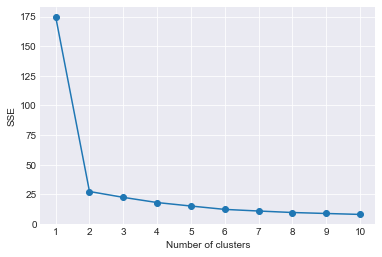

In [5]:
from sklearn.cluster import KMeans


sse = list()

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_norm)
    
    # クラスタ内誤差平方和をリストに追加
    sse.append(kmeans.inertia_)
    
plt.ylabel("SSE")
plt.xlabel("Number of clusters")
plt.xticks(range(1, 11))
plt.plot(range(1, 11), sse, marker="o")
plt.show()

クラス多数３でも実験

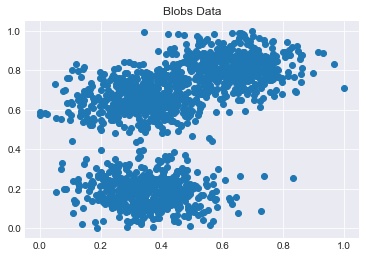

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

plt.style.use("seaborn-darkgrid")


X, y = make_blobs(n_samples=1500, n_features=2, centers=3, random_state=2)


X_norm = MinMaxScaler().fit_transform(X)

# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_norm[:, 0], X_norm[: , 1])
plt.title("Blobs Data")
plt.show()

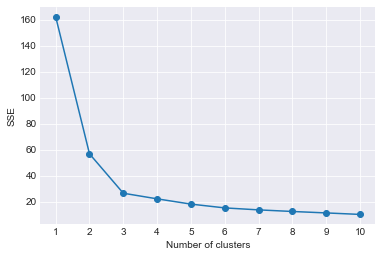

In [7]:
from sklearn.cluster import KMeans


sse = list()

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_norm)
    
    # クラスタ内誤差平方和をリストに追加
    sse.append(kmeans.inertia_)
    
plt.ylabel("SSE")
plt.xlabel("Number of clusters")
plt.xticks(range(1, 11))
plt.plot(range(1, 11), sse, marker="o")
plt.show()

#### シルエット分析

In [8]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import numpy as np


n_clusters = 3
X, y = make_blobs(n_samples=1500, n_features=2, centers=3, random_state=3)
print(X.shape)
print(y.shape)

(1500, 2)
(1500,)


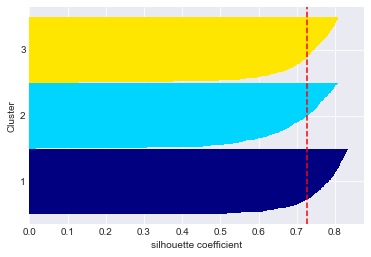

In [9]:
X_norm = MinMaxScaler().fit_transform(X)

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_norm)

silhouette_vals = silhouette_samples(X_norm, cluster_labels, metric="euclidean")

y_lower = 10
y_ticks = list()

for i in range(n_clusters):
    ith_silhouette_vals = silhouette_vals[cluster_labels==i]
    ith_silhouette_vals.sort()
    
    size_cluster_i = ith_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_lower, y_upper), ith_silhouette_vals, height=1.0, color=color)
    y_ticks.append((y_lower + y_upper)/2)
    y_lower += len(ith_silhouette_vals)

    
silhouette_avg = silhouette_score(X_norm, cluster_labels)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, range(1, n_clusters + 1))
plt.ylabel("Cluster")
plt.xlabel("silhouette coefficient")
plt.show()

### <u>t-SNEによる次元圧縮（多様体学習）</u>

- 主成分分析でうまく次元圧縮できないデータセットでも, t-SNEで次元圧縮することができる可能性あり

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve

# データの準備
X, color = make_s_curve(n_samples=1000, random_state=0)
print(X.shape)
print(color.shape)

(1000, 3)
(1000,)


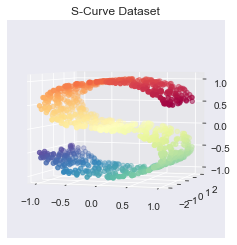

In [11]:
X[:, 1] -= 1.0
X[:, 1] *= 2.0
X[:, 2] *= 0.5

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
ax.set_title("S-Curve Dataset")
plt.show()

/Users/kkurihara/ai/study/ai-engineer/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kkurihara/ai/study/ai-engineer/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


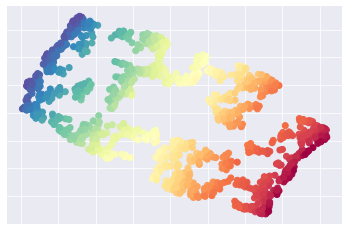

In [12]:
from sklearn.manifold import TSNE
from matplotlib.ticker import NullFormatter

# t-SNEの適用
tsne = TSNE(n_components=2, random_state=0)
y_tsne = tsne.fit_transform(X)

# 次元圧縮結果の可視化
plt.scatter(y_tsne[: , 0], y_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.gca().xaxis.set_major_formatter(NullFormatter())
plt.gca().yaxis.set_major_formatter(NullFormatter())
plt.show()

できた

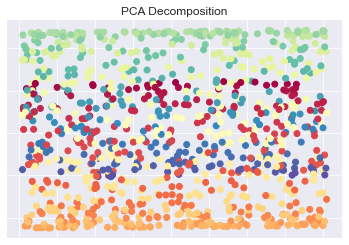

In [13]:
# 主成分分析
from sklearn.decomposition import PCA

pca = PCA(random_state=0)
y_pca = pca.fit_transform(X)

plt.scatter(y_pca[:, 0], y_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA Decomposition")
plt.gca().xaxis.set_major_formatter(NullFormatter())
plt.gca().yaxis.set_major_formatter(NullFormatter())
plt.show()

全然だめ

### <u>異常検知（Novelty Detection, Outlier Detection）</u>

#### Novelty Detection: 特異点検知

In [14]:
# データの準備
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

np.random.seed(1)

# 訓練データの作成
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
print(X.shape)
print(X_train.shape)
print(X[:5])
print(X_train[:5])

(100, 2)
(200, 2)
[[ 0.48730361 -0.18352692]
 [-0.15845153 -0.32189059]
 [ 0.25962229 -0.69046161]
 [ 0.52344353 -0.22836207]
 [ 0.09571173 -0.07481111]]
[[2.48730361 1.81647308]
 [1.84154847 1.67810941]
 [2.25962229 1.30953839]
 [2.52344353 1.77163793]
 [2.09571173 1.92518889]]


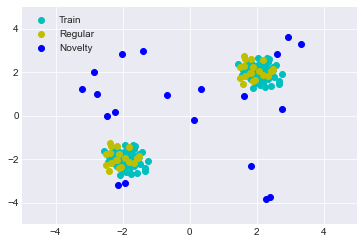

In [15]:
# 正常なデータの作成
X = 0.3 * np.random.randn(20, 2)
X_regular = np.r_[X + 2, X - 2]

# 特異なデータの作成
X_novelty = np.random.uniform(low=-4, high=4, size=(20, 2))

# 疑似データの可視化
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c="c", label="Train")
plt.scatter(X_regular[:, 0], X_regular[:, 1], c="y", label="Regular")
plt.scatter(X_novelty[:, 0], X_novelty[:, 1], c="b", label="Novelty")
plt.legend(loc="upper left")
plt.show()

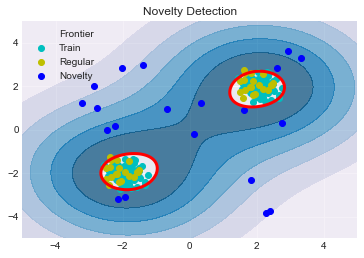

In [16]:
# OneClass SVMの適用
from sklearn import svm


model = svm.OneClassSVM(kernel="rbf", nu=0.01, gamma=0.1)
model.fit(X_train)

# 疑似データおよび特定した境界線(frontier)の可視化
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))


Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.7)
frontier = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="red")
train = plt.scatter(X_train[:, 0], X_train[:, 1], c="c")
normal = plt.scatter(X_regular[:, 0], X_regular[: , 1], c="y")
novelty = plt.scatter(X_novelty[:, 0], X_novelty[:, 1], c="b")

plt.legend([frontier.collections[0], train, normal, novelty], ["Frontier", "Train", "Regular", "Novelty"], loc="upper left", shadow=True)
plt.show()

上の境界線の妥当性チェック

In [17]:
y_pred_train = model.predict(X_train)
y_pred_regular = model.predict(X_regular)
y_pred_novelty = model.predict(X_novelty)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_regular = y_pred_regular[y_pred_regular == -1].size
n_error_novelty = y_pred_novelty[y_pred_novelty == 1].size

print("error train: {}/200".format(n_error_train))
print("error regular: {}/40".format(n_error_regular))
print("error_novelty: {}/40".format(n_error_novelty))

error train: 3/200
error regular: 3/40
error_novelty: 0/40


#### Outlier Detection: 外れ値検知

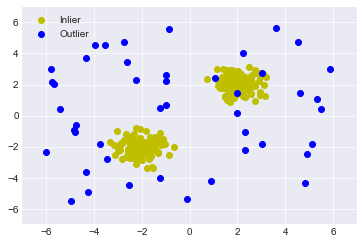

In [18]:
# データセットの準
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(1)
n_samples = 300
outlier_ratio = 0.15
n_outliers = int(n_samples * outlier_ratio)
n_inliers = n_samples - n_outliers

inliers = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], random_state=0, n_samples=n_inliers, n_features=2)[0]
outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))


X_train = np.concatenate([inliers, outliers], axis=0)

plt.scatter(inliers[:, 0], inliers[:, 1], label="Inlier", c="y")
plt.scatter(outliers[:, 0], outliers[:, 1], label="Outlier", c="b")
plt.legend(loc="upper left")
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.show()

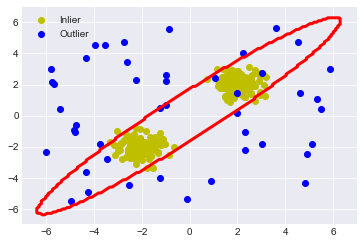

In [19]:
# Elliptic Envelope
from sklearn.covariance import EllipticEnvelope

envelope = EllipticEnvelope(contamination=0.15)
envelope.fit(X_train)


xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

Z = envelope.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(inliers[:, 0], inliers[:, 1], label="Inlier", c="y")
plt.scatter(outliers[:, 0], outliers[:, 1], label="Outlier", c="b")
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="red")
plt.legend(loc="upper left")
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

境界が二つに分かれていない

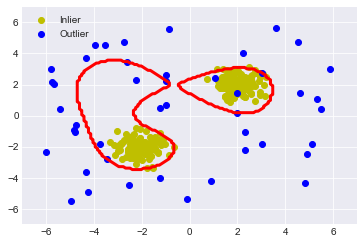

In [20]:
# OneClass SVM
from sklearn import svm


svm = svm.OneClassSVM(nu=outlier_ratio, kernel="rbf", gamma=0.1)
svm.fit(X_train)

xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(inliers[:, 0], inliers[:, 1], label="Inlier", c="y")
plt.scatter(outliers[:, 0], outliers[:, 1], label="Outlier", c="b")
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="red")
plt.legend(loc="upper left")
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

境界は２つに分かれてるけれどいまいち

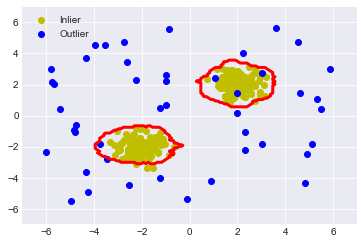

In [21]:
# Isolation Forest

from sklearn.ensemble import IsolationForest

import warnings
warnings.simplefilter("ignore")

isolation = IsolationForest(contamination=outlier_ratio, random_state=42)
isolation.fit(X_train)

xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))
Z = isolation.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(inliers[:, 0], inliers[:, 1], label="Inlier", c="y")
plt.scatter(outliers[:, 0], outliers[:, 1], label="Outlier", c="b")
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="red")
plt.legend(loc="upper left")
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

割と綺麗

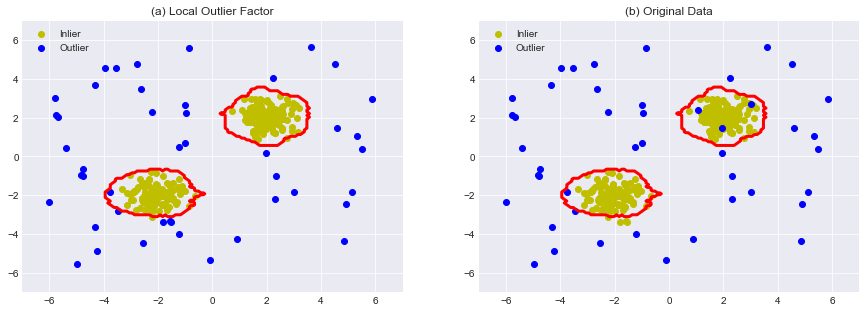

In [25]:
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor


# LocalOutlierFactorの適用
lof = LocalOutlierFactor(n_neighbors=35, contamination=outlier_ratio)
lof.fit(X_train)
y_pred = lof.fit_predict(X_train)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("(a) Local Outlier Factor")
plt.scatter(X_train[y_pred==1][:, 0], X_train[y_pred==1][:, 1], label="Inlier", c="y")
plt.scatter(X_train[y_pred==-1][:, 0], X_train[y_pred==-1][:, 1], label="Outlier", c="b")
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="red")
plt.legend(loc="upper left")
plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.subplot(122)
plt.title("(b) Original Data")
plt.scatter(inliers[:, 0], inliers[:, 1], label="Inlier", c="y")
plt.scatter(outliers[:, 0], outliers[:, 1], label="Outlier", c="b")
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="red")
plt.legend(loc="upper left")
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()